<a href="https://colab.research.google.com/github/Aggie2024/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Agnes Nansubuga

## Project Overview


## Load and Inspect Data

In [2]:
# Importing required packages
import pandas as pd
import numpy as np
# Loading data from URL
df_sales = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRz5oaBgbdiqB7uuCThtSDZkuQ6PVnah-MIhF81nIhaee2YT0rHhLnhLPNBuZYUNO00U4YZRDqaL8ig/pub?gid=1930592101&single=true&output=csv')

In [3]:
# preview of the data
df_sales.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833.0,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000.0,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024.0,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000.0,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000.0,US,50,US,L


In [4]:
# summary of the data columns
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          607 non-null    int64  
 1   work_year           607 non-null    int64  
 2   experience_level    589 non-null    object 
 3   employment_type     607 non-null    object 
 4   job_title           607 non-null    object 
 5   salary              607 non-null    object 
 6   salary_currency     607 non-null    object 
 7   salary_in_usd       587 non-null    float64
 8   employee_residence  607 non-null    object 
 9   remote_ratio        607 non-null    int64  
 10  company_location    607 non-null    object 
 11  company_size        607 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 57.0+ KB


## Clean Data

In [5]:
# checking rows and columns
df_sales.shape

(607, 12)

 - There are 607 rows and 12 columns

In [6]:
# checking the data types of each column
df_sales.dtypes

Unnamed: 0              int64
work_year               int64
experience_level       object
employment_type        object
job_title              object
salary                 object
salary_currency        object
salary_in_usd         float64
employee_residence     object
remote_ratio            int64
company_location       object
company_size           object
dtype: object

- There are 3 integers, 1 float and 8 objects type columns.
- There is an Unnamed: 0 column that is a repeating of the index and will have to be dropped.
- The salary column should be either a float or an integer type column not an object.

### Dropping Unnamed: 0 Column

In [7]:
# deleting/dropping Unnamed:0 column
df_sales.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           607 non-null    int64  
 1   experience_level    589 non-null    object 
 2   employment_type     607 non-null    object 
 3   job_title           607 non-null    object 
 4   salary              607 non-null    object 
 5   salary_currency     607 non-null    object 
 6   salary_in_usd       587 non-null    float64
 7   employee_residence  607 non-null    object 
 8   remote_ratio        607 non-null    int64  
 9   company_location    607 non-null    object 
 10  company_size        607 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 52.3+ KB


### Dropping Duplicates

In [8]:
# checking for duplicates
df_sales.duplicated().sum()

32

- There are 32 duplicates in the dataset.

In [9]:
#Dropping duplicates
df_sales.drop_duplicates(inplace = True)
# checking for that they are dropped
df_sales.duplicated().sum()

0

### Addressing Missing Values

In [10]:
# checking which columns have missing data
df_sales.isna().sum()

work_year              0
experience_level      18
employment_type        0
job_title              0
salary                 0
salary_currency        0
salary_in_usd         20
employee_residence     0
remote_ratio           0
company_location       0
company_size           0
dtype: int64

In [11]:
#checking % of missing data
df_sales.isna().sum() / len(df_sales) * 100

work_year             0.000000
experience_level      3.130435
employment_type       0.000000
job_title             0.000000
salary                0.000000
salary_currency       0.000000
salary_in_usd         3.478261
employee_residence    0.000000
remote_ratio          0.000000
company_location      0.000000
company_size          0.000000
dtype: float64

- There are `18` missing values in the `experience level` column. (3.13%)
- There are `20` missing values in the `salary in usd` column. (3.48%)

Addressing missing values in `experience_level` column.

In [12]:
# Fill in missing values for experience_level column with the word Unknown.
df_sales['experience_level'] = df_sales['experience_level'].fillna(value = 'Unknown')
#checking the column again
df_sales['experience_level'].value_counts()

SE         244
MI         206
EN          85
EX          22
Unknown     18
Name: experience_level, dtype: int64

Addressing missing values in the `salary in usd` column

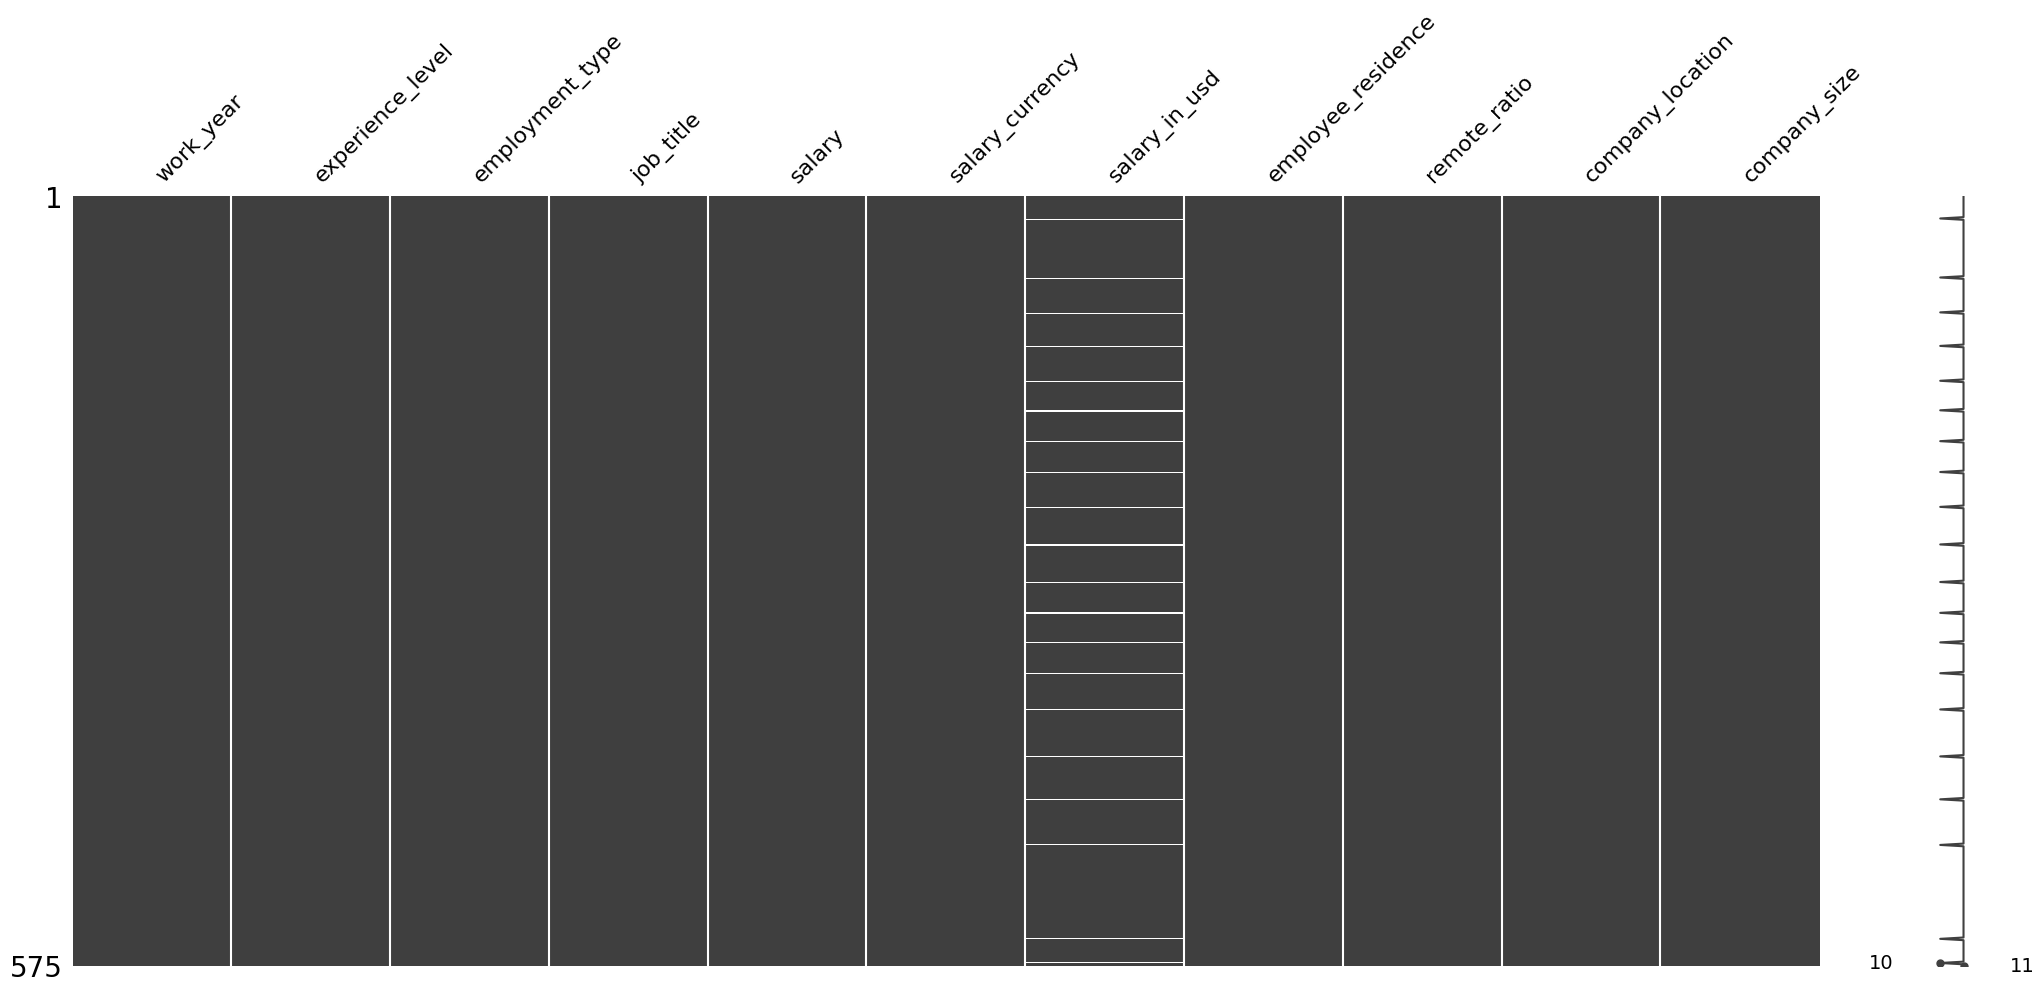

In [14]:
# Visualize the missing values using the missingno package's matrix plot.
import missingno as msno
msno.matrix(df_sales);

In [15]:
# Filling in the missing values for salary_in_usd column with the 'column mean'
var_mean = df_sales['salary_in_usd'].mean()
df_sales['salary_in_usd'] = df_sales['salary_in_usd'].fillna(var_mean)

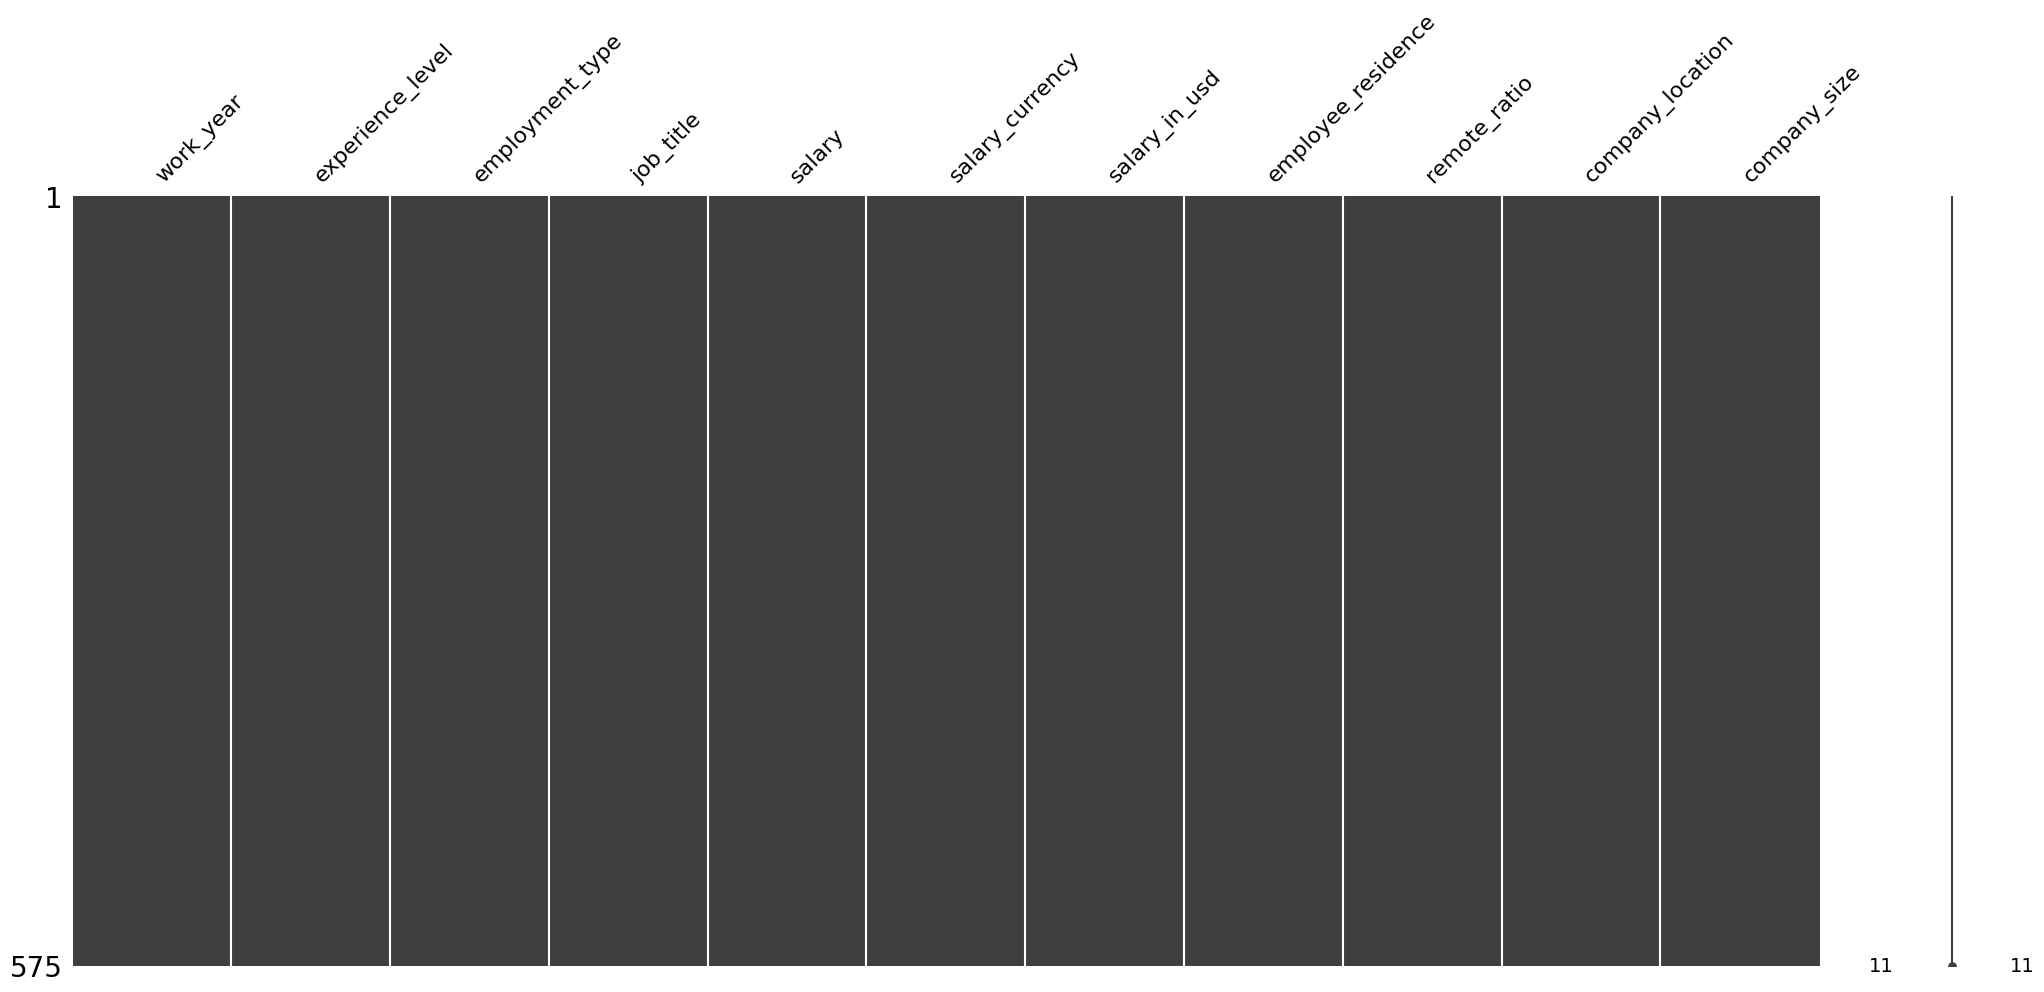

In [16]:
# Confirm no more nulls using missingno
msno.matrix(df_sales);

### Checking for inconsistencies

In [17]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           575 non-null    int64  
 1   experience_level    575 non-null    object 
 2   employment_type     575 non-null    object 
 3   job_title           575 non-null    object 
 4   salary              575 non-null    object 
 5   salary_currency     575 non-null    object 
 6   salary_in_usd       575 non-null    float64
 7   employee_residence  575 non-null    object 
 8   remote_ratio        575 non-null    int64  
 9   company_location    575 non-null    object 
 10  company_size        575 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 53.9+ KB


We previously noted that `salary` column should be an integer or float, so we examine the data to clean the data and correct the data type.

In [18]:
# Inspect the salary column's value counts
df_sales['salary'].value_counts()

80000      18
120000     15
100000     15
60000      14
150000     14
           ..
256000      1
1600000     1
1335000     1
52500       1
129000      1
Name: salary, Length: 273, dtype: int64

In [19]:
#There does not seem to be any obvious error, we convert it to integers
df_sales['salary'] = df_sales['salary'].astype(int)

ValueError: invalid literal for int() with base 10: '$100,000'

In [21]:
# Remove $ from the data
df_sales['salary'].replace ('$100,000', 100000, inplace=True)
# Now we can convert it to integers
df_sales['salary'] = df_sales['salary'].astype(int)
# checking the datatypes again
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           575 non-null    int64  
 1   experience_level    575 non-null    object 
 2   employment_type     575 non-null    object 
 3   job_title           575 non-null    object 
 4   salary              575 non-null    int64  
 5   salary_currency     575 non-null    object 
 6   salary_in_usd       575 non-null    float64
 7   employee_residence  575 non-null    object 
 8   remote_ratio        575 non-null    int64  
 9   company_location    575 non-null    object 
 10  company_size        575 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 53.9+ KB


### Checking for inconsistencies for Categorical Columns

In [24]:
# Save a list of object columns (Hint: select_dtypes)
object_col = df_sales.select_dtypes('object').columns
object_col

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [25]:
# using a filter to create a for_loop that loops through all of the object type columns
for col in object_col:
  # print the value counts for the column
  print(f"Value Counts for {col}")
  print(df_sales[col].value_counts())
  # Print an empty line for readability
  print('\n')

Value Counts for experience_level
SE         244
MI         206
EN          85
EX          22
Unknown     18
Name: experience_level, dtype: int64


Value Counts for employment_type
FT    556
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64


Value Counts for job_title
Data Scientist                              102
Data Engineer                                95
Data Analyst                                 75
Machine Learning Engineer                    39
data scientist                               29
data engr                                    28
Research Scientist                           16
data analyst                                 14
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                  

There are inconsistencies with spellings of the following categories in the `job_title` column:
  - `data scientist` should be `Data Scientist`
  - `data engr` should be `Data Engineer`
  - `data analyst` should be `Data Analyst`

In [26]:
# Correcting the inconsistencies
df_sales['job_title'] = df_sales['job_title'].replace({'data scientist':'Data Scientist',
                   'data engr':'Data Engineer',
                   'data analyst':'Data Analyst'})
# Check the value counts again to confirm
df_sales['job_title'].value_counts()

Data Scientist                              131
Data Engineer                               123
Data Analyst                                 89
Machine Learning Engineer                    39
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

### Renaming levels as per the dictionary for readability
- experience level
- employment type

In [29]:
# Rename the experience level categories.
df_sales['experience_level'] = df_sales['experience_level'].replace({'EN':'Junior','MI':'Intermediate','SE':'Expert','EX':'Director'})
df_sales['experience_level'].value_counts()

Expert          244
Intermediate    206
Junior           85
Director         22
Unknown          18
Name: experience_level, dtype: int64

In [30]:
# Rename the employment type categories.
df_sales['employment_type'] = df_sales['employment_type'].replace({'FT':'Full-Time', 'CT':'Contract', 'PT':'Part-Time', 'FL':'Freelance'})
df_sales['employment_type'].value_counts()

Full-Time    556
Part-Time     10
Contract       5
Freelance      4
Name: employment_type, dtype: int64

### Summary Statistics for Numeric Features

In [31]:
df_sales.describe().round(2)

,work_year,salary,salary_in_usd,remote_ratio
count,575.00,575.00,575.00,575.00
mean,2021.37,334434.87,110239.92,70.09
std,0.70,1586130.85,71116.17,40.91
min,2020.00,4000.00,2859.00,0.00
25%,2021.00,68500.00,61733.50,50.00
50%,2021.00,112300.00,100000.00,100.00
75%,2022.00,165000.00,147400.00,100.00
max,2022.00,30400000.00,600000.00,100.00


There seems to be some values under salary that are 3M compared to the lowest of 4000. Let us explore these to see how to clean the data.

In [32]:
# Find rows with 3M salary and up
sal_3m = df_sales['salary'] >= 30000000
df_sales[sal_3m]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
177,2021,Intermediate,Full-Time,Data Scientist,30400000,CLP,40038.0,CL,100,CL,L


In [33]:
# Dropping the row with the 3M salary as it is likely an error
df_sales.drop(index=177, inplace = True)

In [34]:
# Run the descriptive stats again
df_sales.describe().round(2)

,work_year,salary,salary_in_usd,remote_ratio
count,574.00,574.00,574.00,574.00
mean,2021.37,282055.84,110362.22,70.03
std,0.70,969484.25,71117.65,40.92
min,2020.00,4000.00,2859.00,0.00
25%,2021.00,68250.00,62162.25,50.00
50%,2021.50,112150.00,100400.00,100.00
75%,2022.00,164999.00,147600.00,100.00
max,2022.00,11000000.00,600000.00,100.00


## Exploratory Data Analysis


## Feature Inspection